In [44]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style

In [46]:
data=pd.read_excel('compilationErrorsHumanEval.xlsx') 

data.dropna(subset=['semantic reason'], inplace=True)

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['semantic reason']) #ERROR AFTER EXECUTING THESE #LINES
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(19749, 3019)


For n_clusters = 2 The average silhouette_score is : 0.15930096171400993
For n_clusters = 3 The average silhouette_score is : 0.23293510299717174
For n_clusters = 4 The average silhouette_score is : 0.2646341476972373
For n_clusters = 5 The average silhouette_score is : 0.2971969207576648
For n_clusters = 6 The average silhouette_score is : 0.3117081965298165
For n_clusters = 7 The average silhouette_score is : 0.33078228591943803
For n_clusters = 8 The average silhouette_score is : 0.32579626880899115
For n_clusters = 9 The average silhouette_score is : 0.3384795934342026
For n_clusters = 10 The average silhouette_score is : 0.3437719054681855
For n_clusters = 11 The average silhouette_score is : 0.3206692720241432
For n_clusters = 12 The average silhouette_score is : 0.31924564117580856
For n_clusters = 13 The average silhouette_score is : 0.3139759802448099
For n_clusters = 14 The average silhouette_score is : 0.3377490316400099
For n_clusters = 15 The average silhouette_score is : 

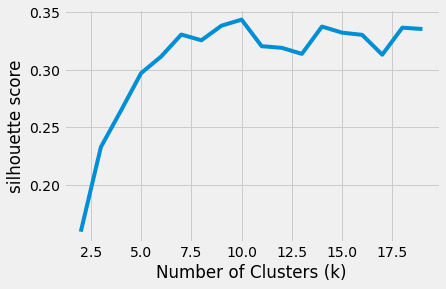

In [48]:
range_n_clusters = [x for x in range(2,20)]
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(tfidf)

    silhouette_avg = silhouette_score(tfidf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)



style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()


In [49]:
num_clusters = 10 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit_predict(tfidf)
clusters = km.labels_.tolist()

data["Cluster"] = clusters

data.to_csv("clusters.csv", index=False) 

In [50]:
print(data['Cluster'].value_counts()) #Print the counts of doc belonging `#to each cluster.`


3    5965
1    2758
9    2686
7    1990
4    1656
2    1442
5    1377
6    1054
8     526
0     295
Name: Cluster, dtype: int64


In [51]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt



Cluster 0 words:

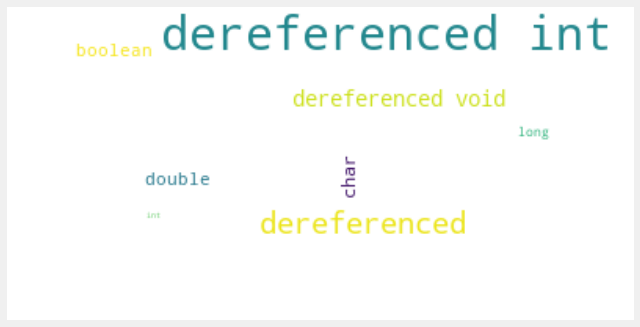



Cluster 1 words:

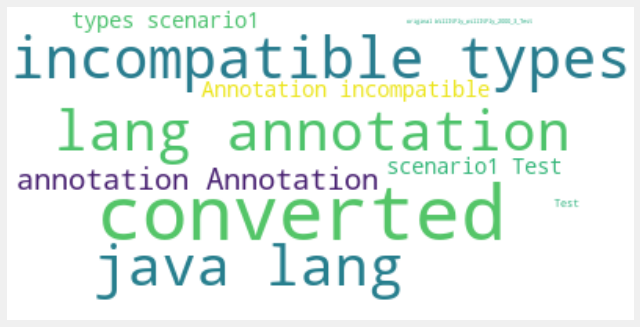



Cluster 2 words:

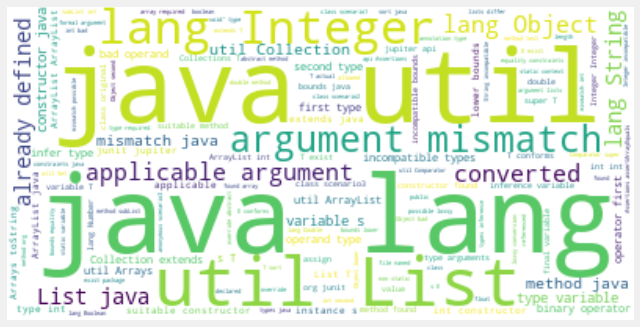



Cluster 3 words:

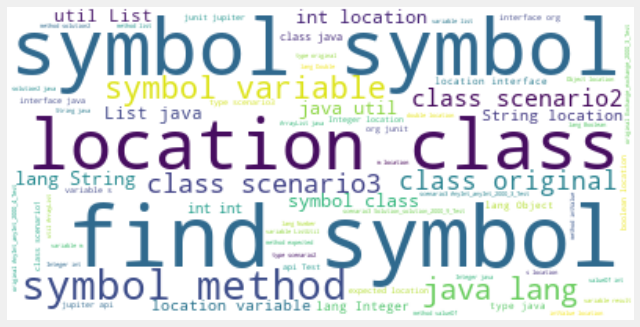



Cluster 4 words:

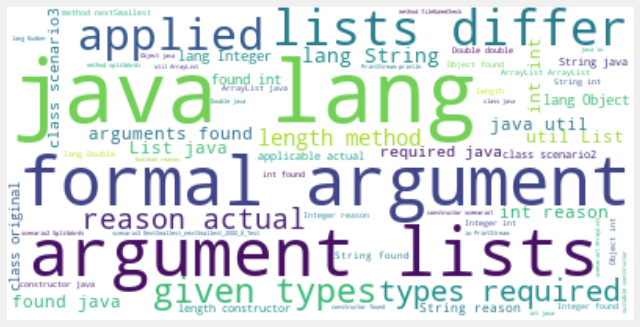



Cluster 5 words:

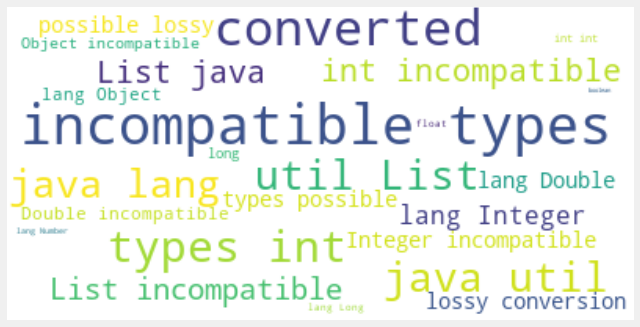



Cluster 6 words:

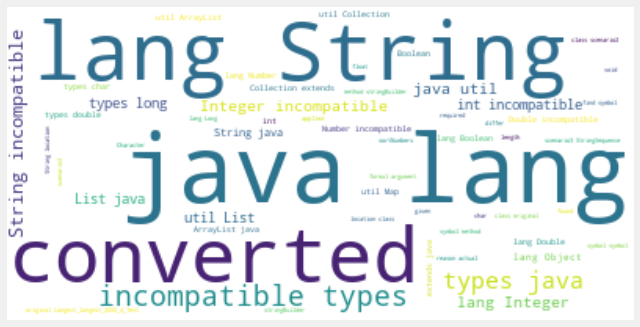



Cluster 7 words:

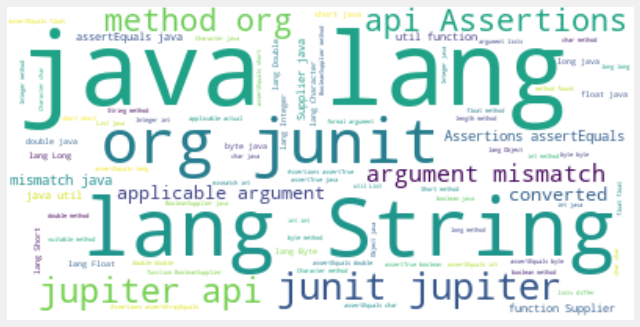



Cluster 8 words:

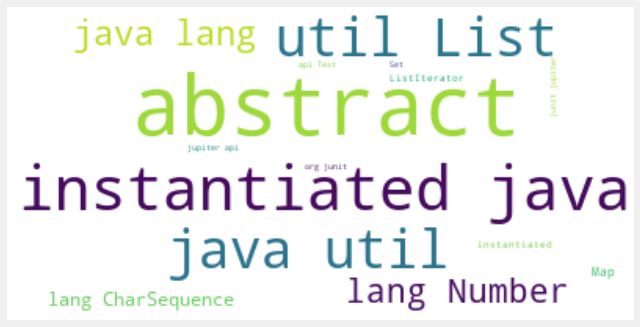



Cluster 9 words:

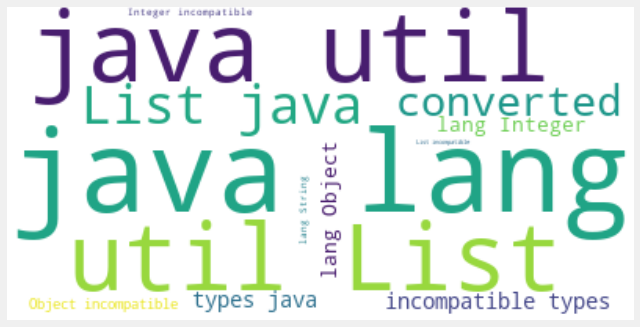

In [52]:
for x in range(0,num_clusters):
    print("\n")
    print("Cluster %d words:" % x, end='')
    
    words = ''
    for i in data[data['Cluster'] == x]['semantic reason'].values:
        words = words + ' '.join(i.split()) + ' '
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)
    plt.figure( figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()